(3, 24500000) (24500000,)


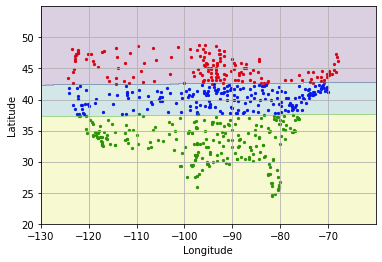

In [20]:
import random
import pandas as pd
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
from autograd.misc.flatten import flatten_func


# import auto diff
# import numpy as np
# from autograd import value_and_grad


# compute C linear combinations, one per classifier
def model(x, w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T


# multiclass perceptron
# lam = 10 ** -21  # reg param


# categorical cross entropy cost function
def categoricalcrossentropy(x, y, w):
    # pre-compute predictions on all points
    all_evals = model(x, w)

    a = np.exp(all_evals).sum(axis=0)
    b = all_evals[y.astype(int), np.arange(np.size(y))]
    cost = -np.sum(np.log(b / a))

    # return average
    return cost / float(np.size(y))


def multiclasssoftmax(x, y, w):
    # pre-compute predictions on all points
    all_evals = model(x, w)
    # compute log across data points
    a = np.log(np.exp(all_evals).sum(axis=0))
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int), np.arange(np.size(y))]
    cost = np.sum(a - b)
    # add reg
    #     cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    # return average
    return cost / float(np.size(y))


# gradient descent function
def gradient_descent(g, step, max_its, w):
    # flatten g
    g_flat, unflatten_func, w_flat = flatten_func(g, w)
    # compute gradient
    gradient = grad(g_flat)
    # gradient descent loop
    weight_history = [w_flat]  # weight history container
    cost_history = [g_flat(w_flat)]  # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w_flat)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd':
            alpha = 1 / (k + 1)
        else:
            alpha = step
        w_flat = w_flat - alpha * grad_eval_norm
        # record weight and cost
        weight_history.append(w_flat)
        cost_history.append(g_flat(w_flat))
    return weight_history, cost_history, unflatten_func


def cost_cal(t):
    c = multiclasssoftmax(x, y, t)
    return c


if __name__ == '__main__':
    raw_data = pd.read_csv("ENGR_518_Solar_energy_datasets.csv")
    location = np.array(raw_data.iloc[:, 3:5])
    ETR = np.array(raw_data.iloc[:, 5])
    category = np.zeros_like(ETR, dtype=int)
    category[ETR <= 320] = 0
    category[(ETR > 320) & (ETR <= 340)] = 1
    category[ETR > 340] = 2

    train_index = random.sample(list(range(category.shape[0])), k=600)
    test_index = list(set(list(range(category.shape[0]))) - set(train_index))
    X_train = location[np.array(train_index)]
    X_test = location[np.array(test_index)]
    y_train = category[np.array(train_index)]
    y_test = category[np.array(test_index)]

    points_per_cls = 20  # points per class
    category_num = 3  # n. classes
    iter = 1000
    N_dimension = 2

    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    x = ((X_train - mean) / std).T
    y = y_train.reshape(1, -1)

    Latitude = X_train[:, 0]  # Latitude
    Longitude = X_train[:, 1]  # Longitude
    label = y_train

    colors = ('r', 'b', 'g')
    plt.scatter(Longitude[label == 0], Latitude[label == 0], c=colors[0], s=5)
    plt.scatter(Longitude[label == 1], Latitude[label == 1], c=colors[1], s=5)
    plt.scatter(Longitude[label == 2], Latitude[label == 2], c=colors[2], s=5)
    plt.grid(1)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')


    w = np.ones((N_dimension + 1, category_num))

    a, b, unflatten = gradient_descent(cost_cal, 0.01, iter, w)
    # exit(3)

    wp = unflatten(a[iter])
    Longitude = np.arange(-130, -60, 0.01)
    Latitude = np.arange(20, 55, 0.01)
    yy, xx = np.meshgrid(Latitude, Longitude)
    # vectorize mesh grid
    xp1_v = yy.reshape(-1, 1)
    xp2_v = xx.reshape(-1, 1)
    Xp_data = np.concatenate([yy.reshape(-1, 1), xx.reshape(-1, 1)], axis=1)
    Xp_data = (Xp_data - mean) / std
    v = model(Xp_data.T, wp)
    z = np.argmax(v, axis=0)
    print(v.shape,z.shape)
    z = z.reshape(yy.shape)

    plt.contourf(xx, yy, z, alpha=.2)
    plt.show()
    
    


In [21]:
mean = np.mean(X_test, axis=0)
std = np.std(X_test, axis=0)
X_test = (X_test - mean) / std
vt = model(X_test.T, wp)
zt = np.argmax(vt, axis=0)
# zt = zt.reshape(y_test.shape)
print(vt.shape)
print(zt.shape)
print(y_test.shape)
print("ACC in test data:", np.mean(zt == y_test))

(3, 325)
(325,)
(325,)
ACC in test data: 0.9661538461538461


(3, 24500000) (24500000,)


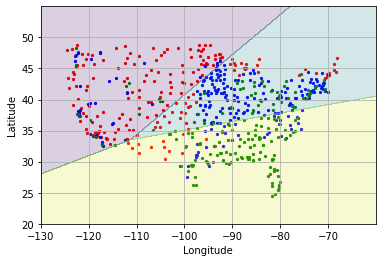

(3, 325)
(325,)
(325,)
ACC in test data: 0.6584615384615384


In [3]:
import random
import pandas as pd
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
from autograd.misc.flatten import flatten_func


# import auto diff
# import numpy as np
# from autograd import value_and_grad


# compute C linear combinations, one per classifier
def model(x, w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T


# multiclass perceptron
# lam = 10 ** -21  # reg param


# categorical cross entropy cost function
def categoricalcrossentropy(x, y, w):
    # pre-compute predictions on all points
    all_evals = model(x, w)

    a = np.exp(all_evals).sum(axis=0)
    b = all_evals[y.astype(int), np.arange(np.size(y))]
    cost = -np.sum(np.log(b / a))

    # return average
    return cost / float(np.size(y))


def multiclasssoftmax(x, y, w):
    # pre-compute predictions on all points
    all_evals = model(x, w)
    # compute log across data points
    a = np.log(np.exp(all_evals).sum(axis=0))
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int), np.arange(np.size(y))]
    cost = np.sum(a - b)
    # add reg
    #     cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    # return average
    return cost / float(np.size(y))


# gradient descent function
def gradient_descent(g, step, max_its, w):
    # flatten g
    g_flat, unflatten_func, w_flat = flatten_func(g, w)
    # compute gradient
    gradient = grad(g_flat)
    # gradient descent loop
    weight_history = [w_flat]  # weight history container
    cost_history = [g_flat(w_flat)]  # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w_flat)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd':
            alpha = 1 / (k + 1)
        else:
            alpha = step
        w_flat = w_flat - alpha * grad_eval_norm
        # record weight and cost
        weight_history.append(w_flat)
        cost_history.append(g_flat(w_flat))
    return weight_history, cost_history, unflatten_func


def cost_cal(t):
    c = multiclasssoftmax(x, y, t)
    return c


if __name__ == '__main__':
    raw_data = pd.read_csv("ENGR_518_Solar_energy_datasets.csv")
    location = np.array(raw_data.iloc[:, 3:5])
#     ETR = np.array(raw_data.iloc[:, 5])
    METSTAT = np.array(raw_data.iloc[:, 6])
#     category = np.zeros_like(ETR, dtype=int)
    category = np.zeros_like(METSTAT, dtype=int)
    category[METSTAT <= 60] = 0
    category[(METSTAT > 60) & (METSTAT <= 70)] = 1
    category[METSTAT > 70] = 2

    train_index = random.sample(list(range(category.shape[0])), k=600)
    test_index = list(set(list(range(category.shape[0]))) - set(train_index))
    X_train = location[np.array(train_index)]
    X_test = location[np.array(test_index)]
    y_train = category[np.array(train_index)]
    y_test = category[np.array(test_index)]

    points_per_cls = 20  # points per class
    category_num = 3  # n. classes
    iter = 1000
    N_dimension = 2

    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    x = ((X_train - mean) / std).T
    y = y_train.reshape(1, -1)

    Latitude = X_train[:, 0]  # Latitude
    Longitude = X_train[:, 1]  # Longitude
    label = y_train

    colors = ('r', 'b', 'g')
    plt.scatter(Longitude[label == 0], Latitude[label == 0], c=colors[0], s=5)
    plt.scatter(Longitude[label == 1], Latitude[label == 1], c=colors[1], s=5)
    plt.scatter(Longitude[label == 2], Latitude[label == 2], c=colors[2], s=5)
    plt.grid(1)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')


    w = np.ones((N_dimension + 1, category_num))

    a, b, unflatten = gradient_descent(cost_cal, 0.01, iter, w)
    # exit(3)

    wp = unflatten(a[iter])
    Longitude = np.arange(-130, -60, 0.01)
    Latitude = np.arange(20, 55, 0.01)
    yy, xx = np.meshgrid(Latitude, Longitude)
    # vectorize mesh grid
    xp1_v = yy.reshape(-1, 1)
    xp2_v = xx.reshape(-1, 1)
    Xp_data = np.concatenate([yy.reshape(-1, 1), xx.reshape(-1, 1)], axis=1)
    Xp_data = (Xp_data - mean) / std
    v = model(Xp_data.T, wp)
    z = np.argmax(v, axis=0)
    print(v.shape,z.shape)
    z = z.reshape(yy.shape)

    plt.contourf(xx, yy, z, alpha=.2)
    plt.show()
    
    mean = np.mean(X_test, axis=0)
    std = np.std(X_test, axis=0)
    X_test = (X_test - mean) / std
    vt = model(X_test.T, wp)
    zt = np.argmax(vt, axis=0)
    # zt = zt.reshape(y_test.shape)
    print(vt.shape)
    print(zt.shape)
    print(y_test.shape)
    print("ACC in test data:", np.mean(zt == y_test))
